In [622]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [623]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./dataset_small_sample/",
    shuffle=False,
    image_size=(96, 96),
    batch_size=75
)

Found 75 files belonging to 1 classes.


In [624]:
class_name = dataset.class_names
class_name

['abigail_williams_(fate)']

In [625]:
df = next(iter(dataset.take(1)))[0]
print(df.shape, df.__class__.__name__)

(75, 96, 96, 3) EagerTensor


C:\Users\x2421\AppData\Local\Temp\ipykernel_24088\2673142426.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


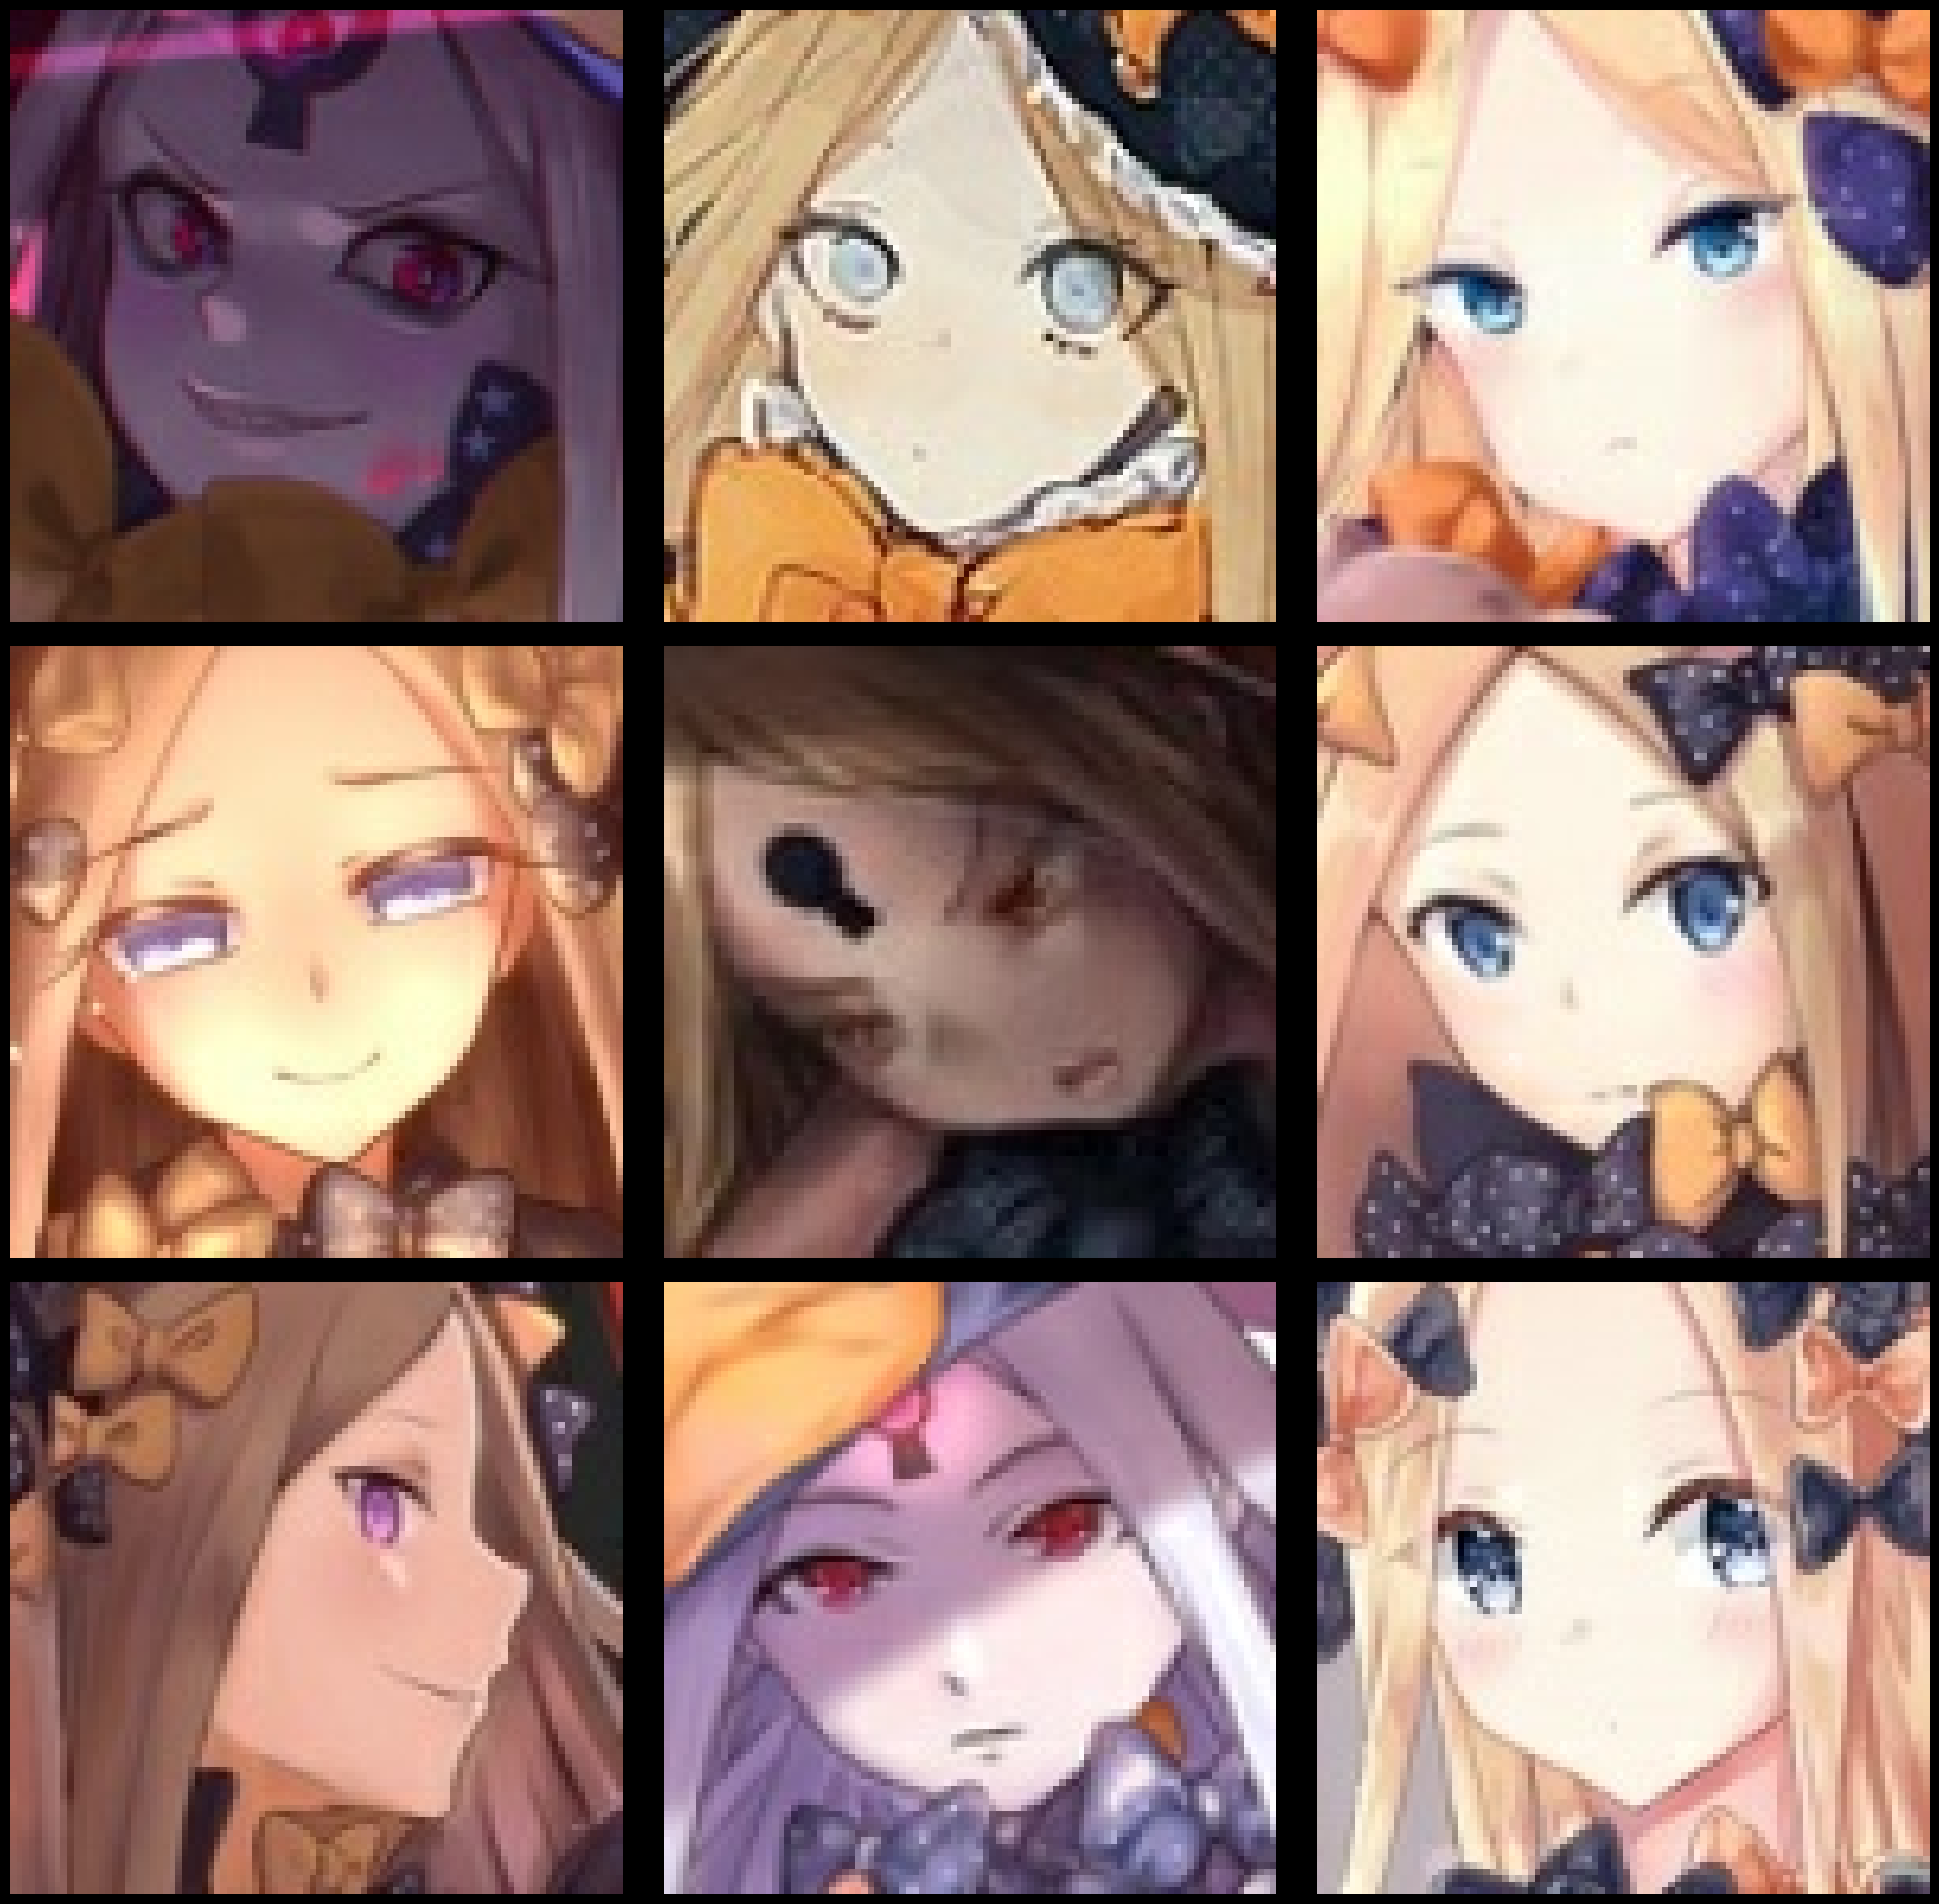

In [626]:
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(df[i].numpy().astype("uint8"))
    plt.tight_layout()
    plt.axis("off")

In [627]:
train_len = int(len(df) * 0.7)
test_len = len(df) - train_len
print(train_len, test_len)

52 23


In [628]:
train_ds = df[:train_len]
test_ds = df[train_len:]
print(len(train_ds), len(test_ds))

52 23


In [629]:
flatten_layer = tf.keras.layers.Flatten()
train_ds = flatten_layer(train_ds)

In [630]:
train_ds.shape

TensorShape([52, 27648])

In [631]:
class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.n_hidden_1 = 1028
        self.n_hidden_2 = 512
        self.n_hidden_3 = 256
        self.n_hidden_4 = 128
        self.n_hidden_5 = 64
        self.encoding_layer = 32
        self.n_input = 96 * 96 * 3
        
        self.flatten_layer = tf.keras.layers.Flatten()
        self.encoding_1 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.encoding_2 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.encoding_3 = tf.keras.layers.Dense(self.n_hidden_3, activation=tf.nn.sigmoid)
        self.encoding_4 = tf.keras.layers.Dense(self.n_hidden_4, activation=tf.nn.sigmoid)
        self.encoding_5 = tf.keras.layers.Dense(self.n_hidden_5, activation=tf.nn.sigmoid)
        self.encoding_final = tf.keras.layers.Dense(self.encoding_layer, activation=tf.nn.relu)
        self.decoding_1 = tf.keras.layers.Dense(self.n_hidden_5, activation=tf.nn.sigmoid)
        self.decoding_2 = tf.keras.layers.Dense(self.n_hidden_4, activation=tf.nn.sigmoid)
        self.decoding_3 = tf.keras.layers.Dense(self.n_hidden_3, activation=tf.nn.sigmoid)
        self.decoding_4 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.decoding_5 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.decoding_final = tf.keras.layers.Dense(self.n_input)
        
    def encoder(self, x):
        layer_1 = self.encoding_1(x)
        layer_2 = self.encoding_2(layer_1)
        layer_3 = self.encoding_3(layer_2)
        layer_4 = self.encoding_4(layer_3)
        layer_5 = self.encoding_5(layer_4)
        code = self.encoding_final(layer_5)
        return code
    
    def decoder(self, x):
        layer_1 = self.decoding_1(x)
        layer_2 = self.decoding_2(layer_1)
        layer_3 = self.decoding_3(layer_2)
        layer_4 = self.decoding_4(layer_3)
        layer_5 = self.decoding_5(layer_4)
        decode = self.decoding_final(layer_5)
        return decode
    
    def call(self, x):
        encoder_op = self.encoder(x)
        y_pred = self.decoder(encoder_op)
        return y_pred

def cost(y_true, y_pred):
    loss = tf.losses.mean_squared_error(y_true, y_pred)
    cost = tf.reduce_mean(loss)
    return cost

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        reconstruction = model(inputs)
        loss_value = cost(targets, reconstruction)
    return loss_value, tape.gradient(loss_value, model.trainable_variables), reconstruction

In [632]:
total_batch = int(len(train_ds)/16)
global_step = tf.Variable(0)
display_step = 1

In [633]:
model = AutoEncoder()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
for epoch in range(100):
    for i in range(total_batch):
        x_inp = train_ds[i : i+16]
        loss_value, grads, reconstruction = grad(model, x_inp, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if i % 1 == 0:
        print("Epoch:", "%04d" % (epoch+1),
                "cost=", "{:.9f}".format(loss_value))
            
print("Finish")

Epoch: 0001 cost= 31881.839843750
Epoch: 0002 cost= 29392.955078125
Epoch: 0003 cost= 27751.478515625
Epoch: 0004 cost= 26498.941406250
Epoch: 0005 cost= 25419.162109375
Epoch: 0006 cost= 24441.390625000
Epoch: 0007 cost= 23532.630859375
Epoch: 0008 cost= 22674.753906250
Epoch: 0009 cost= 21856.845703125
Epoch: 0010 cost= 21071.919921875
Epoch: 0011 cost= 20315.343750000
Epoch: 0012 cost= 19583.937500000
Epoch: 0013 cost= 18875.486328125
Epoch: 0014 cost= 18188.416015625
Epoch: 0015 cost= 17521.589843750
Epoch: 0016 cost= 16874.185546875
Epoch: 0017 cost= 16245.582031250
Epoch: 0018 cost= 15635.324218750
Epoch: 0019 cost= 15043.058593750
Epoch: 0020 cost= 14468.509765625
Epoch: 0021 cost= 13911.451171875
Epoch: 0022 cost= 13371.701171875
Epoch: 0023 cost= 12849.098632812
Epoch: 0024 cost= 12343.496093750
Epoch: 0025 cost= 11854.763671875
Epoch: 0026 cost= 11382.768554688
Epoch: 0027 cost= 10927.380859375
Epoch: 0028 cost= 10488.467773438
Epoch: 0029 cost= 10065.890625000
Epoch: 0030 co

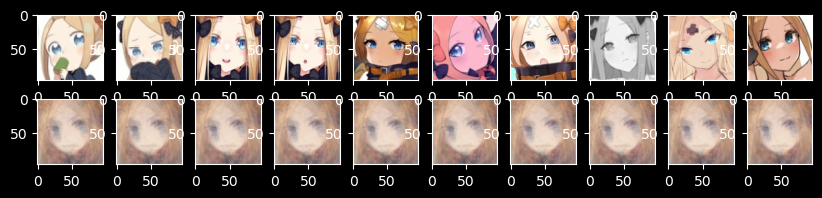

In [634]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    encode_decode = model(flatten_layer(test_ds[i:i+1]))
    a[0][i].imshow(np.reshape(test_ds[i], (96, 96, 3)).astype("uint8"))
    a[1][i].imshow(np.reshape(encode_decode[0], (96, 96, 3)).astype("uint8"))

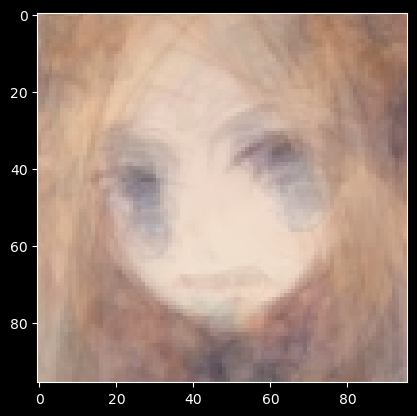

In [635]:
encode_decode = model(flatten_layer(test_ds[i:i+1]))
plt.imshow((np.reshape(encode_decode[0], (96, 96, 3)).astype("uint8")))